# 期中報告

## 1. 引入套件

In [1]:
from datetime import datetime
from collections import Counter

import jieba
import jieba.analyse
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

In [2]:
# 設定圖的字體
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 2. 資料前處理

### 2.1 基本資料介紹
資料來源：
+ 工作流程平台蒐集PTT 機車版(biker)文章
+ 關鍵字:「電動機車、電動車、機車選購、充電、保養、優惠、服務、折扣」
+ 時間: 2020-01-01 ~ 2023-04-12
+ 資料筆數：共 1517 篇文章

In [3]:
#匯入資料
df = pd.read_csv('rawData/eMotor_2020_2023.csv')
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"大家好,我是原PO,結果今天順利入手FT6 ABS了,就按照去年的方案有送丟車陪車險\n\n...","[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
1,2,https://www.ptt.cc/bbs/biker/M.1578023690.A.E2...,[閒聊]Gogoro真的那麼不堪嗎？,2020-01-03 03:48:48,ObeseMansion,biker,現在是電動車的世代了\n\n特斯拉在台灣一個月交1000台\n\n但是一台150+萬\n\n...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""s90755166"", ...",111.82.99.55,2020-01-03 00:06:32,ptt
2,3,https://www.ptt.cc/bbs/biker/M.1578025353.A.6B...,Re:[閒聊]Gogoro真的那麼不堪嗎？,2020-01-03 04:16:30,james7923,biker,砲睿能的後勤、組裝品質、售後服務、\n\n電動車續航不足、換電站常常沒滿電電池\n\n其實我...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""WATERDRY"", ""...",61.230.77.8,2020-01-03 00:06:32,ptt
3,4,https://www.ptt.cc/bbs/biker/M.1578030814.A.7D...,[閒聊]ionex電動車真的那麼不堪嗎？,2020-01-03 05:47:32,KKKKJAY,biker,現在是電動車的世代了\n\n特斯拉在台灣一個月交1000台\n\n但是一台150+萬\n\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""id44kimo"", ""...",117.19.227.226,2020-01-04 00:05:52,ptt
4,5,https://www.ptt.cc/bbs/biker/M.1578038772.A.CD...,Re:[閒聊]Gogoro真的那麼不堪嗎？,2020-01-03 08:00:10,virkin,biker,很多人炮GOGORO一大理由是領政府補助\n但這個邏輯非常不通\n\n台灣政府補助電動機車早...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""DSNT"", ""cmtC...",101.9.132.40,2020-01-04 00:05:52,ptt
...,...,...,...,...,...,...,...,...,...,...,...
1512,1513,https://www.ptt.cc/bbs/biker/M.1681027654.A.80...,[選購]適合業務跑長途偶而載貨用車,2023-04-09 16:07:32,a83h45566,biker,《欲比較之品牌及車種》\n\n (1) YAMAHA 勁豪 125 碟煞 2...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""defenser"", ""...",114.24.221.125,2023-04-10 01:03:44,ptt
1513,1514,https://www.ptt.cc/bbs/biker/M.1681132059.A.85...,[選購]新手通勤輕檔車推薦,2023-04-10 21:07:37,Ccj87328,biker,《是否至車行看過實車》\n\n No\n\n 《欲比較之品牌及車種》\n\n (1...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ryama"", ""cmt...",36.238.128.18,2023-04-11 01:03:36,ptt
1514,1515,https://www.ptt.cc/bbs/biker/M.1681132530.A.2F...,[問題]定期換火星塞算cp值高的保養嗎?,2023-04-10 21:15:28,n74042300,biker,如題\n\n定期更換火星塞算是個CP值不錯的保養嗎\n\n這邊講的是原廠的\n\n不是其他那...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jacky1009"", ...",58.114.15.72,2023-04-11 01:03:36,ptt
1515,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,買機車選擇何其多，各家品牌都推陳出新，不斷推新款車\n其實看每個人的需求不同，要就當然要選一...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt


### 2.2 資料初步清理
清除內文為空值的文章<br>
透過觀察發現ptt的文章常用兩個換行符號作為句子的結尾，因此將兩個換行取代為句號，並清除不重要的字如換行、網址

In [4]:
clear_df = df.copy()

#去除有包含空值的筆數
clear_df.dropna(axis=0, how='any')

#用'。'取代'\n\n'，並移除'\n'
clear_df = clear_df.replace(r'\\n\\n', '。', regex=True).replace(r'\n', '', regex=True)

#移除內文中的網址
clear_df['artContent'] = clear_df['artContent'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"大家好,我是原PO,結果今天順利入手FT6 ABS了,就按照去年的方案有送丟車陪車險只不過現...","[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
1,2,https://www.ptt.cc/bbs/biker/M.1578023690.A.E2...,[閒聊]Gogoro真的那麼不堪嗎？,2020-01-03 03:48:48,ObeseMansion,biker,現在是電動車的世代了特斯拉在台灣一個月交1000台但是一台150+萬能負擔的人不多然而gog...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""s90755166"", ...",111.82.99.55,2020-01-03 00:06:32,ptt
2,3,https://www.ptt.cc/bbs/biker/M.1578025353.A.6B...,Re:[閒聊]Gogoro真的那麼不堪嗎？,2020-01-03 04:16:30,james7923,biker,砲睿能的後勤、組裝品質、售後服務、電動車續航不足、換電站常常沒滿電電池其實我覺得這些確實是現...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""WATERDRY"", ""...",61.230.77.8,2020-01-03 00:06:32,ptt
3,4,https://www.ptt.cc/bbs/biker/M.1578030814.A.7D...,[閒聊]ionex電動車真的那麼不堪嗎？,2020-01-03 05:47:32,KKKKJAY,biker,現在是電動車的世代了特斯拉在台灣一個月交1000台但是一台150+萬能負擔的人不多然而ion...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""id44kimo"", ""...",117.19.227.226,2020-01-04 00:05:52,ptt
4,5,https://www.ptt.cc/bbs/biker/M.1578038772.A.CD...,Re:[閒聊]Gogoro真的那麼不堪嗎？,2020-01-03 08:00:10,virkin,biker,很多人炮GOGORO一大理由是領政府補助但這個邏輯非常不通台灣政府補助電動機車早在1995年...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""DSNT"", ""cmtC...",101.9.132.40,2020-01-04 00:05:52,ptt
...,...,...,...,...,...,...,...,...,...,...,...
1512,1513,https://www.ptt.cc/bbs/biker/M.1681027654.A.80...,[選購]適合業務跑長途偶而載貨用車,2023-04-09 16:07:32,a83h45566,biker,《欲比較之品牌及車種》 (1) YAMAHA 勁豪 125 碟煞 2023款...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""defenser"", ""...",114.24.221.125,2023-04-10 01:03:44,ptt
1513,1514,https://www.ptt.cc/bbs/biker/M.1681132059.A.85...,[選購]新手通勤輕檔車推薦,2023-04-10 21:07:37,Ccj87328,biker,《是否至車行看過實車》 No 《欲比較之品牌及車種》 (1) MSX GROM 1...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ryama"", ""cmt...",36.238.128.18,2023-04-11 01:03:36,ptt
1514,1515,https://www.ptt.cc/bbs/biker/M.1681132530.A.2F...,[問題]定期換火星塞算cp值高的保養嗎?,2023-04-10 21:15:28,n74042300,biker,如題定期更換火星塞算是個CP值不錯的保養嗎這邊講的是原廠的不是其他那些價格高的 雖然差沒多...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jacky1009"", ...",58.114.15.72,2023-04-11 01:03:36,ptt
1515,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,買機車選擇何其多，各家品牌都推陳出新，不斷推新款車其實看每個人的需求不同，要就當然要選一台：...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt


### 2.3 斷句
中文主要以標點符號進行斷句，並清除空的字串

In [5]:
clear_df['artContent'] = clear_df['artContent'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('artContent').reset_index(drop=True)

# 把長度小於1的content刪掉
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,大家好,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
1,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,我是原PO,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,結果今天順利入手FT6 ABS了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
3,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,就按照去年的方案有送丟車陪車險只不過現金4000變成全聯禮券4000,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
4,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,不過也算等值還好,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
...,...,...,...,...,...,...,...,...,...,...,...
23618,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,雙載或運貨應該綽綽有餘,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt
23619,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,中柱很好踩,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt
23620,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,就算女生也能很輕鬆架起尤其像台北停車格很小就都要立中柱省空間,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt
23621,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,不然就要喬車喬個老半天…cc 大地名流試乘體驗開跑,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt


### 2.4 斷詞
斷詞引擎設定：使用 Jieba 當作斷詞系統。
Jieba原先內建為簡體字字典，但我們可以使用繁體字典來做為替換，結果會比較好。另外可能還有一些專有名詞是沒有被包含在預設字典當中，我們也可以使用自定義字典的方式加入，或者使用參數的形式帶入。

In [6]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
# 將user_dict改為以下字詞陳吉仲、好市多、好事多、產蛋率、吉仲
jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/user_dict.txt')

Building prefix dict from c:\Users\collin\Desktop\socialMedia_project\dict\dict.txt ...
Loading model from cache C:\Users\collin\AppData\Local\Temp\jieba.u5ae51a7e740c9af1ab5a92f566d53c76.cache
Loading model cost 0.292 seconds.
Prefix dict has been built successfully.


斷詞前先將標點符號清除，並清除空字串

In [7]:
sent_df['artContent'] = sent_df['artContent'].str.replace(r'[^\w\s\d]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,大家好,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
1,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,我是原PO,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,結果今天順利入手FT6 ABS了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
3,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,就按照去年的方案有送丟車陪車險只不過現金4000變成全聯禮券4000,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
4,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,不過也算等值還好,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt
...,...,...,...,...,...,...,...,...,...,...,...
23618,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,雙載或運貨應該綽綽有餘,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt
23619,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,中柱很好踩,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt
23620,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,就算女生也能很輕鬆架起尤其像台北停車格很小就都要立中柱省空間,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt
23621,1516,https://www.ptt.cc/bbs/biker/M.1681182339.A.97...,[心得]KYMCO大地名流試乘物超所值的購車選擇,2023-04-11 11:05:37,ying710618,biker,不然就要喬車喬個老半天cc 大地名流試乘體驗開跑,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jhbgybj321"",...",1.171.178.134,2023-04-12 01:03:35,ptt


使用jieba進行斷詞

In [8]:
word_df = sent_df.assign(word = sent_df['artContent'].apply(jieba.lcut)).explode('word').drop(['artContent'], axis=1)

word_df = word_df.loc[word_df['word'].str.len()>1]

word_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,大家
1,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,PO
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,結果
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,今天
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,順利
...,...,...,...,...,...,...,...,...,...,...,...
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,積碳
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,300
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,請問
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,問題


### 2.5 移除停用字

In [9]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
# 新增目前、連結、標題、知道、報導、指出....等停用字
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

移除dataframe中的停用字

In [10]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
1,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,PO
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,今天
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,順利
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,入手
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,FT6
...,...,...,...,...,...,...,...,...,...,...,...
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,積碳
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,300
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,請問
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,問題


### 2.6 計算詞頻

In [11]:
freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df

,word,freq
0,問題,903
1,機車,837
2,保養,781
3,車行,627
4,目前,595
...,...,...
26006,換七期車,1
26007,換七號,1
26008,fi,1
26009,few,1


### 2.7 視覺化結果

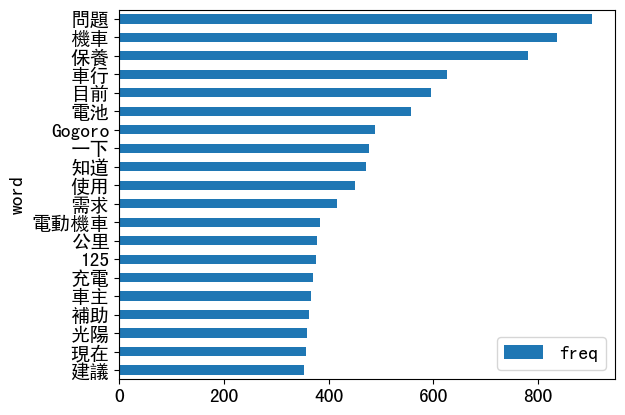

In [12]:
freq_df.iloc[:20].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

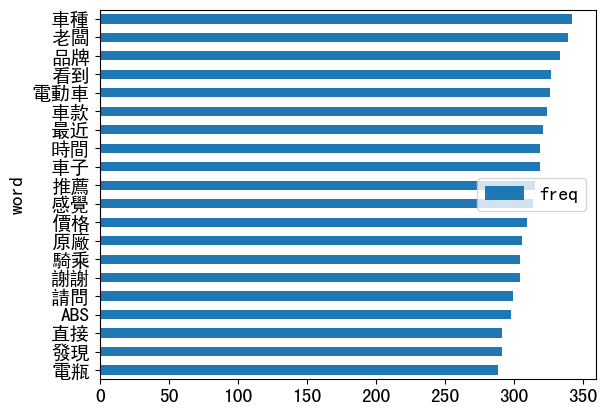

In [13]:
freq_df.iloc[20:40].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

### 2.8 更新停用字字典

In [14]:
# 參數形式手動加入停用字
stopwords_manual = ["謝謝", "一下", "問題", "感覺", "目前", "請問", "發現", "直接", "知道", "看到", "現在", "車子", "建議", "車主", "希望", "10", "一點"]
stopwords.extend(stopwords_manual)

In [15]:
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
1,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,PO
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,今天
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,順利
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,入手
2,1,https://www.ptt.cc/bbs/biker/M.1577980639.A.95...,Re:[新車]TIGRA200/ALPHAMAX/BONABS,2020-01-02 15:51:17,smapkid,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sad0soul"", ""...",211.75.124.200,2020-01-03 00:06:32,ptt,FT6
...,...,...,...,...,...,...,...,...,...,...,...
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,老闆
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,說換
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,火星塞
23623,1517,https://www.ptt.cc/bbs/biker/M.1681209523.A.1D...,[閒聊]修機車的經驗,2023-04-11 18:38:41,bwhmj,biker,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RonanXidi"", ...",61.67.249.75,2023-04-12 01:03:35,ptt,積碳


#### 重新計算詞頻

In [16]:
freq_df_2 = pd.DataFrame({'freq':noStop_df_2.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']  
freq_df_2 = freq_df_2[clist]
freq_df_2

,word,freq
0,機車,837
1,保養,781
2,車行,627
3,電池,558
4,Gogoro,488
...,...,...
25989,木曾,1
25990,木柵,1
25991,木質調,1
25992,同色,1


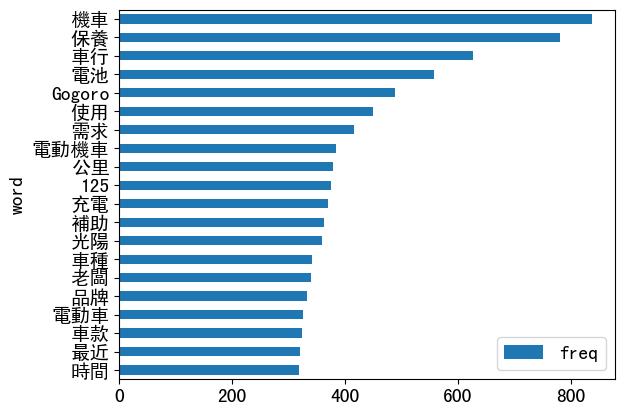

In [17]:
freq_df_2.iloc[:20].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

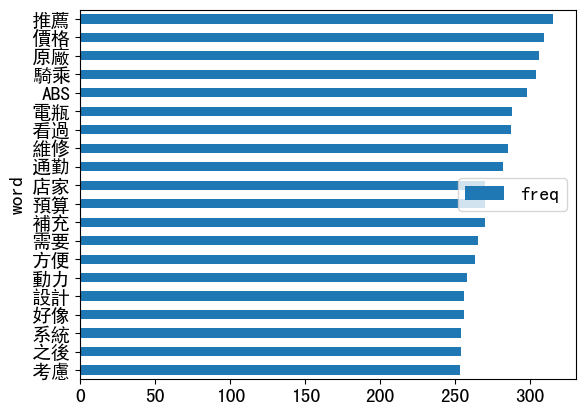

In [18]:
freq_df_2.iloc[20: 40].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

### 2.9 繪製文字雲

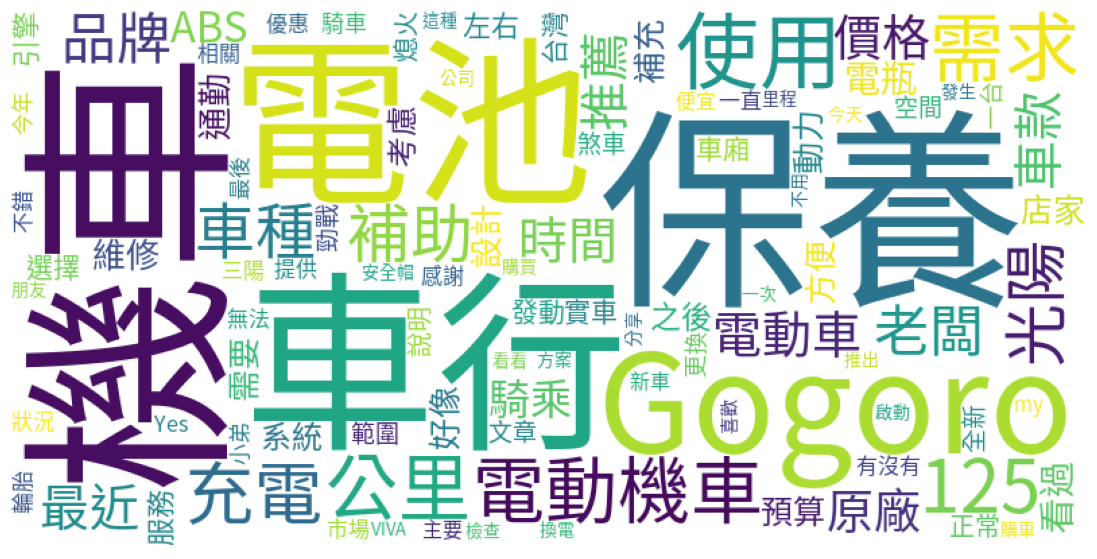

In [22]:
# 詞頻變成dict
freq_dict = freq_df_2.set_index('word', inplace=False).to_dict()
freq_dict = freq_dict['freq']

# 繪製文字雲
FontPath = 'rawData/SourceHanSansTW-Regular.otf' # 設定字型
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=FontPath, max_words=100)
wordcloud.generate_from_frequencies(freq_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis('off')
# plt.show()

# 儲存並顯示文字雲
plt.savefig('pic/wordcloud.png', bbox_inches='tight')